## Project 6: Visualizing Monetary Policy

In [1]:
import os 
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [2]:
# Define the start date for the FRED data retrieval
start = datetime.datetime(1948, 1, 1)

# Define the end date for the FRED data retrieval as today's date
end = datetime.datetime.today()

# Use the FRED API to retrieve the quarterly data for GDP, from start to end date
# and calculate the mean of each quarter
df = web.DataReader('GDPC1', 'fred', start, end).resample('Q').mean()

# Print the resulting DataFrame
df


,GDPC1
DATE,
1948-03-31,2087.442
1948-06-30,2121.899
1948-09-30,2134.056
1948-12-31,2136.440
1949-03-31,2107.001
...,...
2021-12-31,20006.181
2022-03-31,19924.088
2022-06-30,19895.271


<AxesSubplot: xlabel='DATE'>

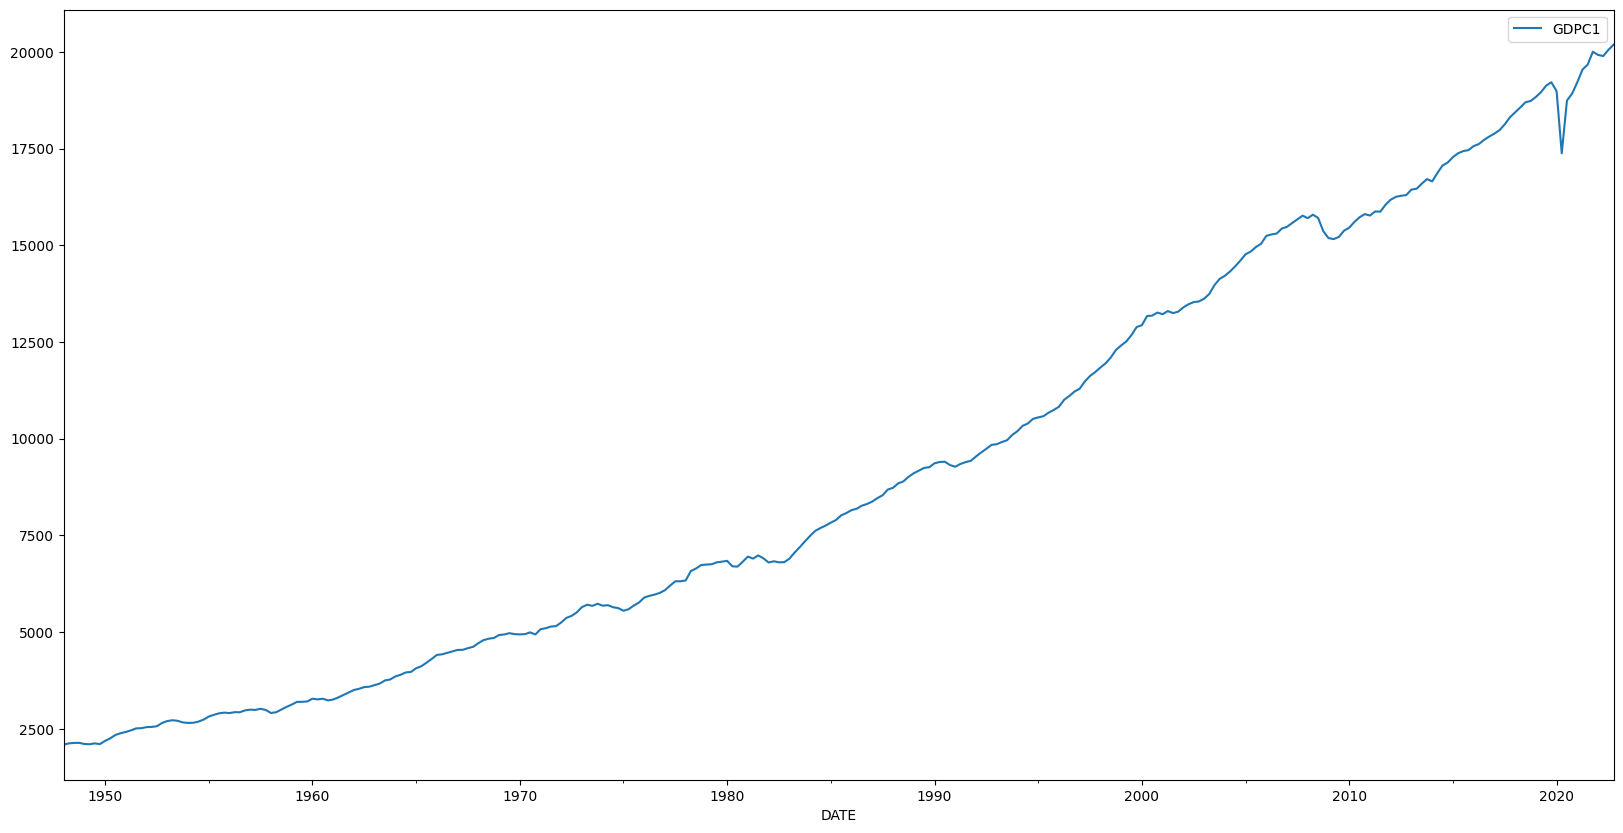

In [3]:
# Plot the data in `df` as a line plot with a specified figure size
df.plot.line(figsize=(20, 10))

In [4]:
# Define a function called gather_data that takes in several parameters
def gather_data(data_code, start,
                end=datetime.datetime.today(),
                freq='M'):

    # Initialize a flag variable to False
    df_init = False
    
    # Loop through each key-value pair in data_codes
    for key, code in data_codes.items():
        # Check if a DataFrame has been created yet
        if df_init == False:
            # If not, create a new DataFrame and store the retrieved data
            df = web.DataReader(code, 'fred', start, end).resample(freq).mean() # first() or last() or median
            df.rename(columns= {code:key}, inplace= True)
            df_init = True
        else:
            # If a DataFrame has already been created, add the retrieved data to it
            df[key] = web.DataReader(code, 'fred', start, end).resample(freq).mean()
    
    # Return the final DataFrame
    return df


In [5]:
# Define a dictionary called data_codes that maps names to FRED codes for economic data series
data_codes = {'Base: Total' : 'BOGMBASEW',
                'Base: Currency in Circulation' : 'WCURCIR'}

# Define the start and end dates for the data retrieval
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

# Use the gather_data function to retrieve the data and resample it to weekly frequency
data = gather_data(data_code=data_codes, start=start, end=end, freq='W')

# Multiply the 'Base: Currency in Circulation' column by 1000 to convert from billions to millions
data['Base: Currency in Circulation'] = data['Base: Currency in Circulation'].mul(1000)


In [6]:
# Retrieve the last 12 rows of the DataFrame 'data'
data.iloc[-12:]

,Base: Total,Base: Currency in Circulation
DATE,,
2020-06-28,4866046.0,1961158.0
2020-07-05,4866046.0,1967076.0
2020-07-12,4772522.0,1974690.0
2020-07-19,4772522.0,1978510.0
2020-07-26,4609143.0,1982873.0
2020-08-02,4609143.0,1988190.0
2020-08-09,4750981.0,1996626.0
2020-08-16,4750981.0,2003019.0
2020-08-23,4830999.0,2007458.0


<AxesSubplot: xlabel='DATE'>

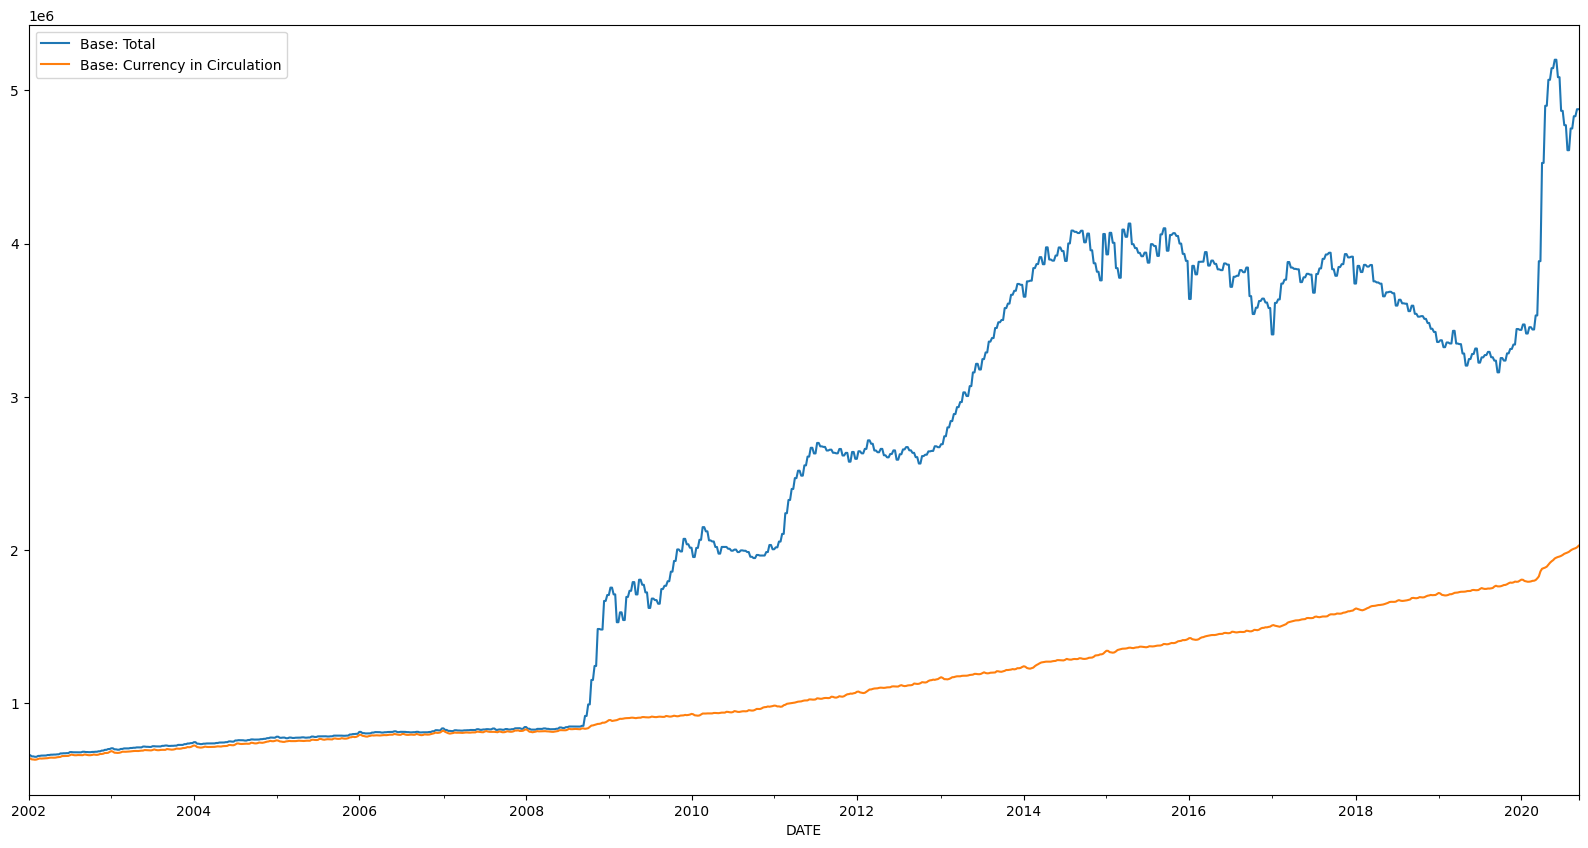

In [7]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the 'data' DataFrame on the axes object
data.plot.line(ax=ax)

<AxesSubplot: xlabel='DATE'>

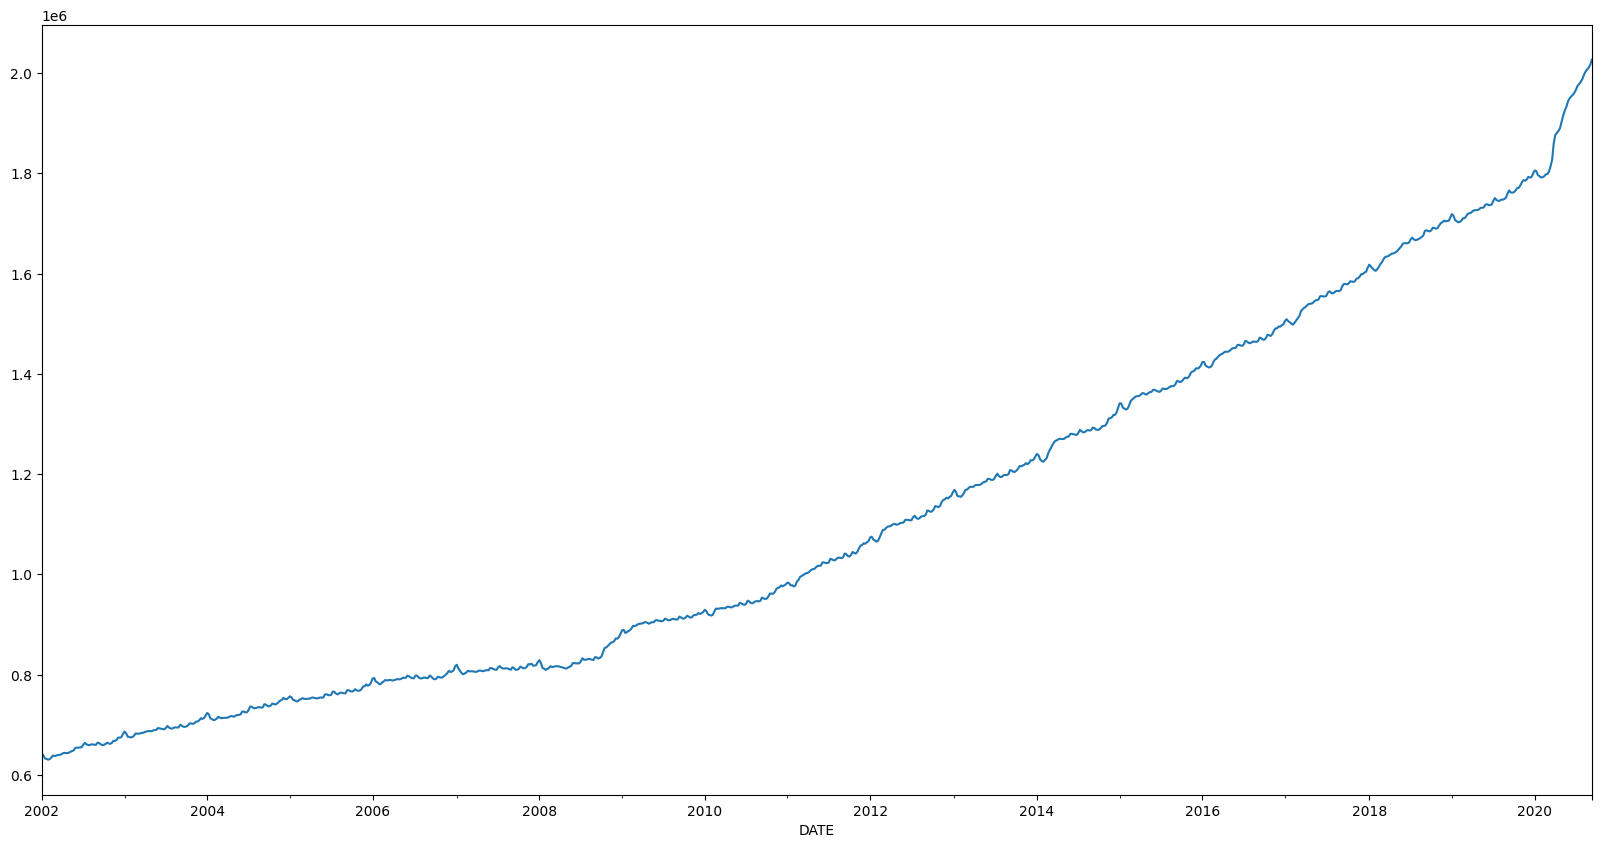

In [8]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the 'Base: Currency in Circulation' column of the 'data' DataFrame on the axes object
data['Base: Currency in Circulation'].plot.line(ax=ax)

In [9]:
# Define FRED codes for economic indicators
data_codes  = {'Base: Total ($ Mil)': 'BOGMBASE',
               'Base: Currency in Circulation ($ Mil)': 'WCURCIR',
               # Assets
               'Balance Sheet: Total Assets ($ Mil)': 'WALCL',
               'Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)': 'WSRLL',
               'Balance Sheet: Securities Held Outright ($ Mil)': 'WSHOSHO',
               ### breakdown of securities holdings ###
               'Balance Sheet: U.S. Treasuries Held Outright ($ Mil)':'WSHOTSL',
               'Balance Sheet: Federal Agency Debt Securities ($ Mil)' : 'WSHOFADSL',
               'Balance Sheet: Mortgage-Backed Securities ($ Mil)': 'WSHOMCB',
               # other forms of lending
               'Balance Sheet: Repos ($ Mil)': 'WORAL',
               'Balance Sheet: Central Bank Liquidity Swaps ($ Mil)' : 'SWPT',
               'Balance Sheet: Direct Lending ($ Mil)' : 'WLCFLL',
               # unamortized value of securities held (due to changes in interest rates)
               'Balance Sheet: Unamortized Security Premiums ($ Mil)': 'WUPSHO',
               # Liabilities
               'Balance Sheet: Total Liabilities ($ Mil)' : 'WLTLECL',
               'Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)' : 'WLFN',
               'Balance Sheet: Reverse Repos ($ Mil)': 'WLRRAL',
               ### Major share of deposits 
               'Balance Sheet: Excess Reserves ($ Mil)': 'EXCSRESNW',
               'Balance Sheet: Required Reserves ($ Mil)': 'RESBALREQW',
               'Balance Sheet: Total Reserves ($ Mil)': 'WRESBAL',
               'Balance Sheet: Deposits from Dep. Institutions ($ Mil)':'WLODLL',
               'Balance Sheet: U.S. Treasury General Account ($ Mil)': 'WDTGAL',
               'Balance Sheet: Other Deposits ($ Mil)': 'WOTHLB',
               'Balance Sheet: All Deposits ($ Mil)': 'WLDLCL',
               # Interest Rates
               'Federal Funds Target (Pre-Crisis)': 'DFEDTAR',
               'Federal Funds (Upper) Target':'DFEDTARU',
               'Effective Federal Funds Rate':'DFF',
               'Interest on Excess Reserves':'IOER',
               'Interest on Reserve Balances':'IORB',

               # Req Reserves and Vault Cash
               'Vault Cash ($ Mil)': 'TLVAULTW',
               'Vault Cash Used as Req. ($ Mil)': 'VAULT',
               }

# Call the gather_data() function to retrieve the data
data = gather_data(data_code=data_codes,
                   start=start,
                   end=end,
                   freq='M')


In [10]:
# Save the data DataFrame to a CSV file
data.to_csv('MonetaryData.csv')

<AxesSubplot: xlabel='DATE'>

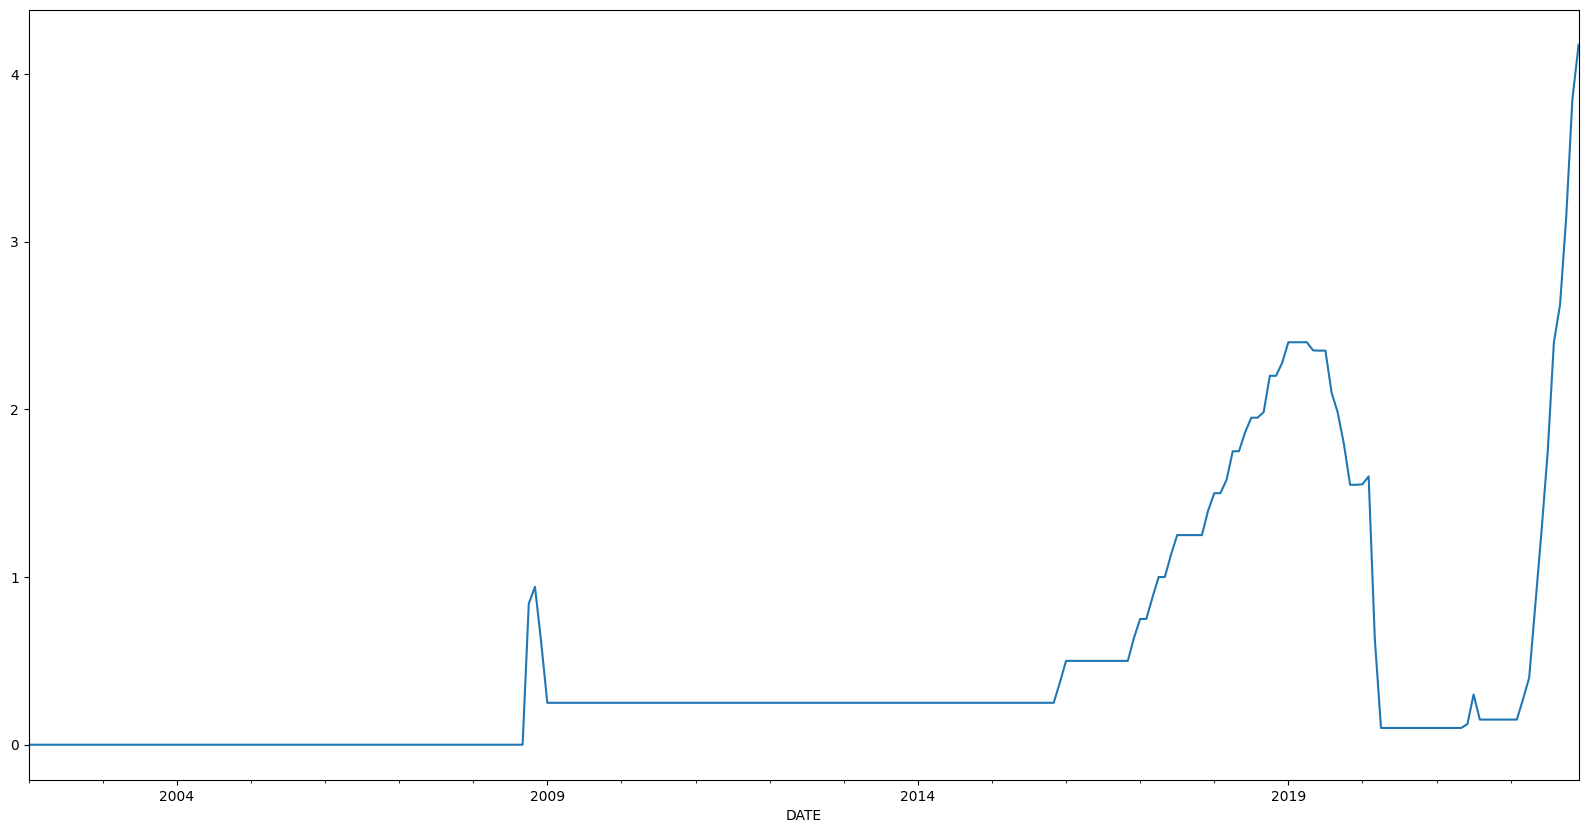

In [11]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_data = data[['Interest on Reserve Balances', 'Interest on Excess Reserves']]
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis=1)   
plot_data.plot.line(ax = ax) 

### Merge two data sets, interest on reserves at Fed, with one overlappin date

In [12]:
# Select the columns from the DataFrame that contain interest data
plot_data = data[['Interest on Reserve Balances', 'Interest on Excess Reserves']]

# Find any rows where the two columns equal
match = plot_data[plot_data['Interest on Reserve Balances'] == plot_data['Interest on Excess Reserves']]

# Extract the date indices of the matching rows and calculate the average
match_date = match.index
match_val = match.sum(axis=1) / 2

# Fill any missing values in the DataFrame with zero
plot_data = plot_data.fillna(0)

# Sum the values in each row to get the total
plot_data = plot_data.sum(axis=1)

# Replace the match_date with match_val
plot_data.loc[match_date] = match_val

# Print the match_date and match_val
print(match_date, match_val)


DatetimeIndex(['2021-07-31'], dtype='datetime64[ns]', name='DATE', freq='M') DATE
2021-07-31    0.15
Freq: M, dtype: float64


<AxesSubplot: xlabel='DATE'>

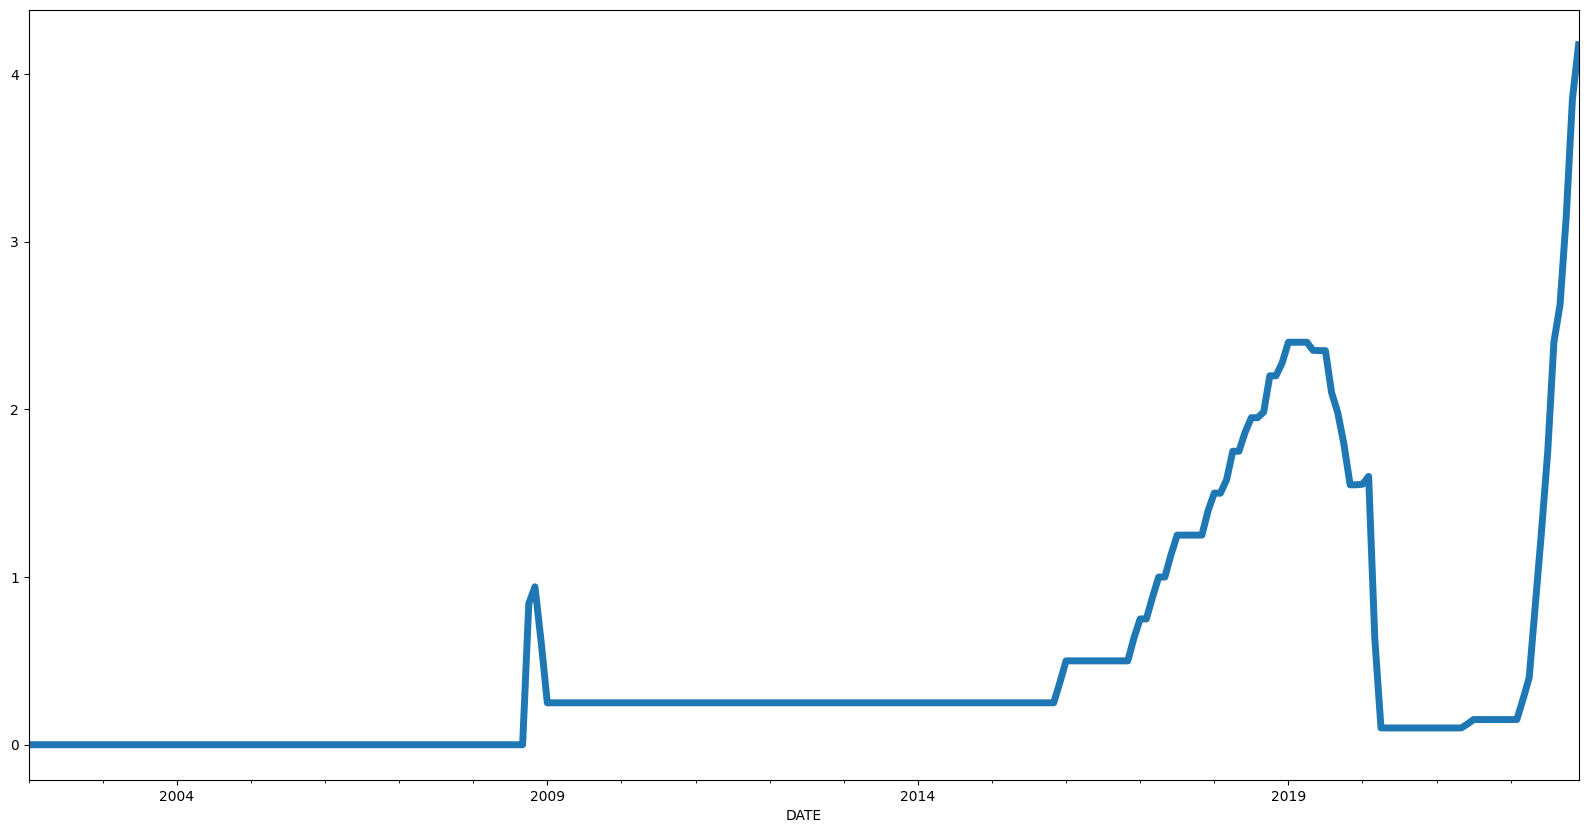

In [13]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_data.plot.line(linewidth = 5, ax = ax)

In [14]:
plot_data

DATE
2002-01-31    0.000000
2002-02-28    0.000000
2002-03-31    0.000000
2002-04-30    0.000000
2002-05-31    0.000000
                ...   
2022-08-31    2.400000
2022-09-30    2.625000
2022-10-31    3.150000
2022-11-30    3.850000
2022-12-31    4.174194
Freq: M, Length: 252, dtype: float64

<AxesSubplot: xlabel='DATE'>

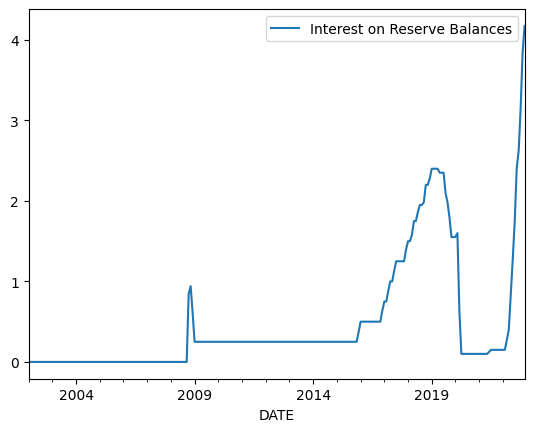

In [15]:
data['Interest on Reserve Balances'] = plot_data
data[['Interest on Reserve Balances']].plot()

Text(0.5, 1.0, 'Currency In Circulation')

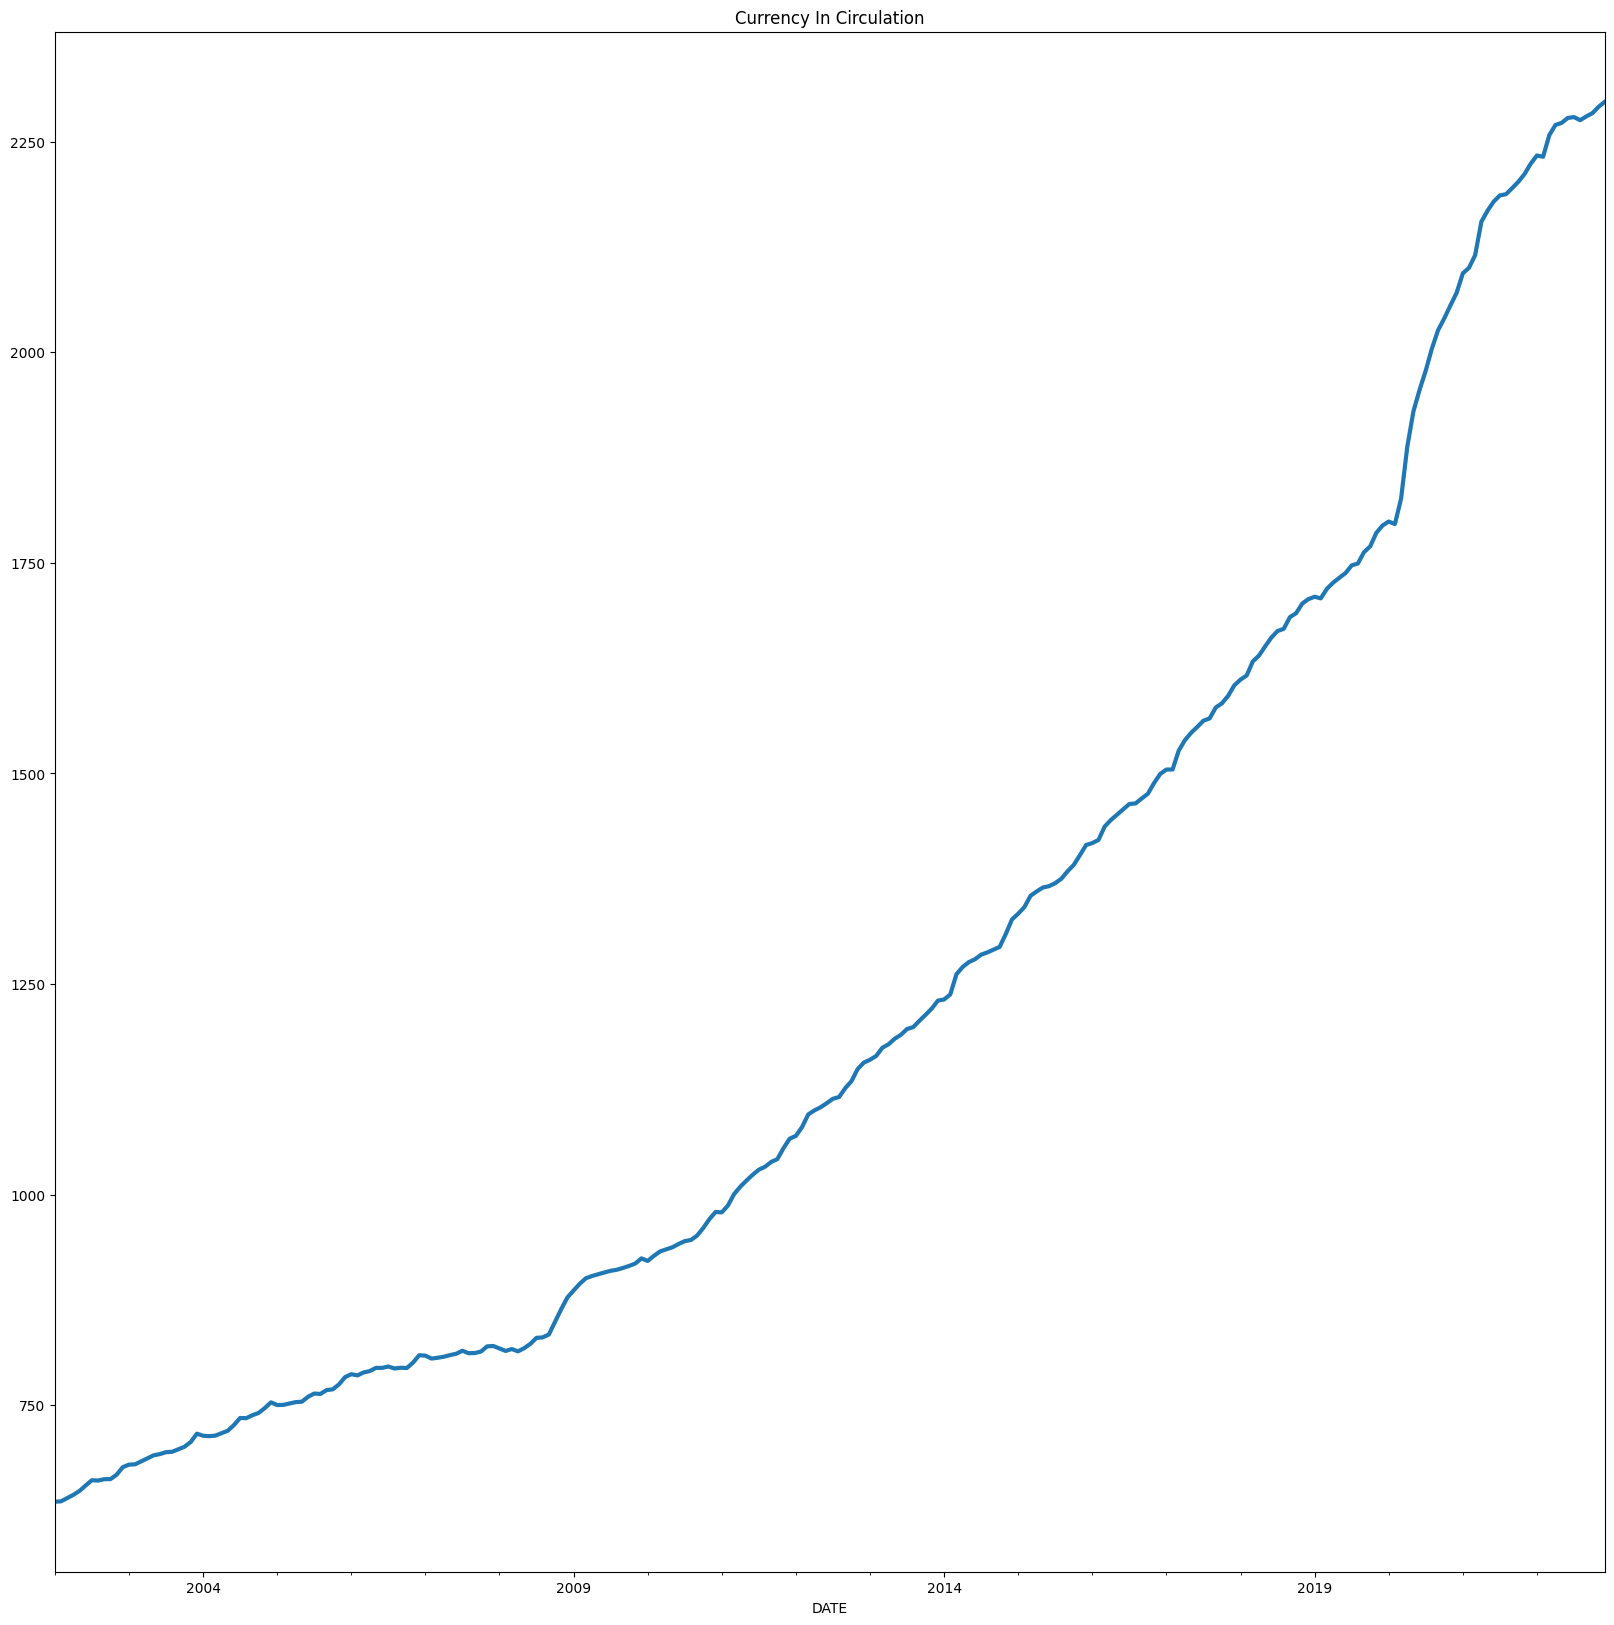

In [16]:
fig, ax = plt.subplots(figsize = (20, 20))
data['Base: Currency in Circulation ($ Mil)'].plot.line(linewidth = 3, ax = ax)
ax.set_title('Currency In Circulation')

### Build Function to Plot Lines of the data in the dataframe

C:\Users\akoto\AppData\Local\Temp\ipykernel_4300\4139410198.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])
C:\Users\akoto\AppData\Local\Temp\ipykernel_4300\4139410198.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_vals])


[Text(0, -1.0, '-1.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 1.0, '1.0%'),
 Text(0, 2.0, '2.0%'),
 Text(0, 3.0, '3.0%'),
 Text(0, 4.0, '4.0%'),
 Text(0, 5.0, '5.0%'),
 Text(0, 6.0, '6.0%')]

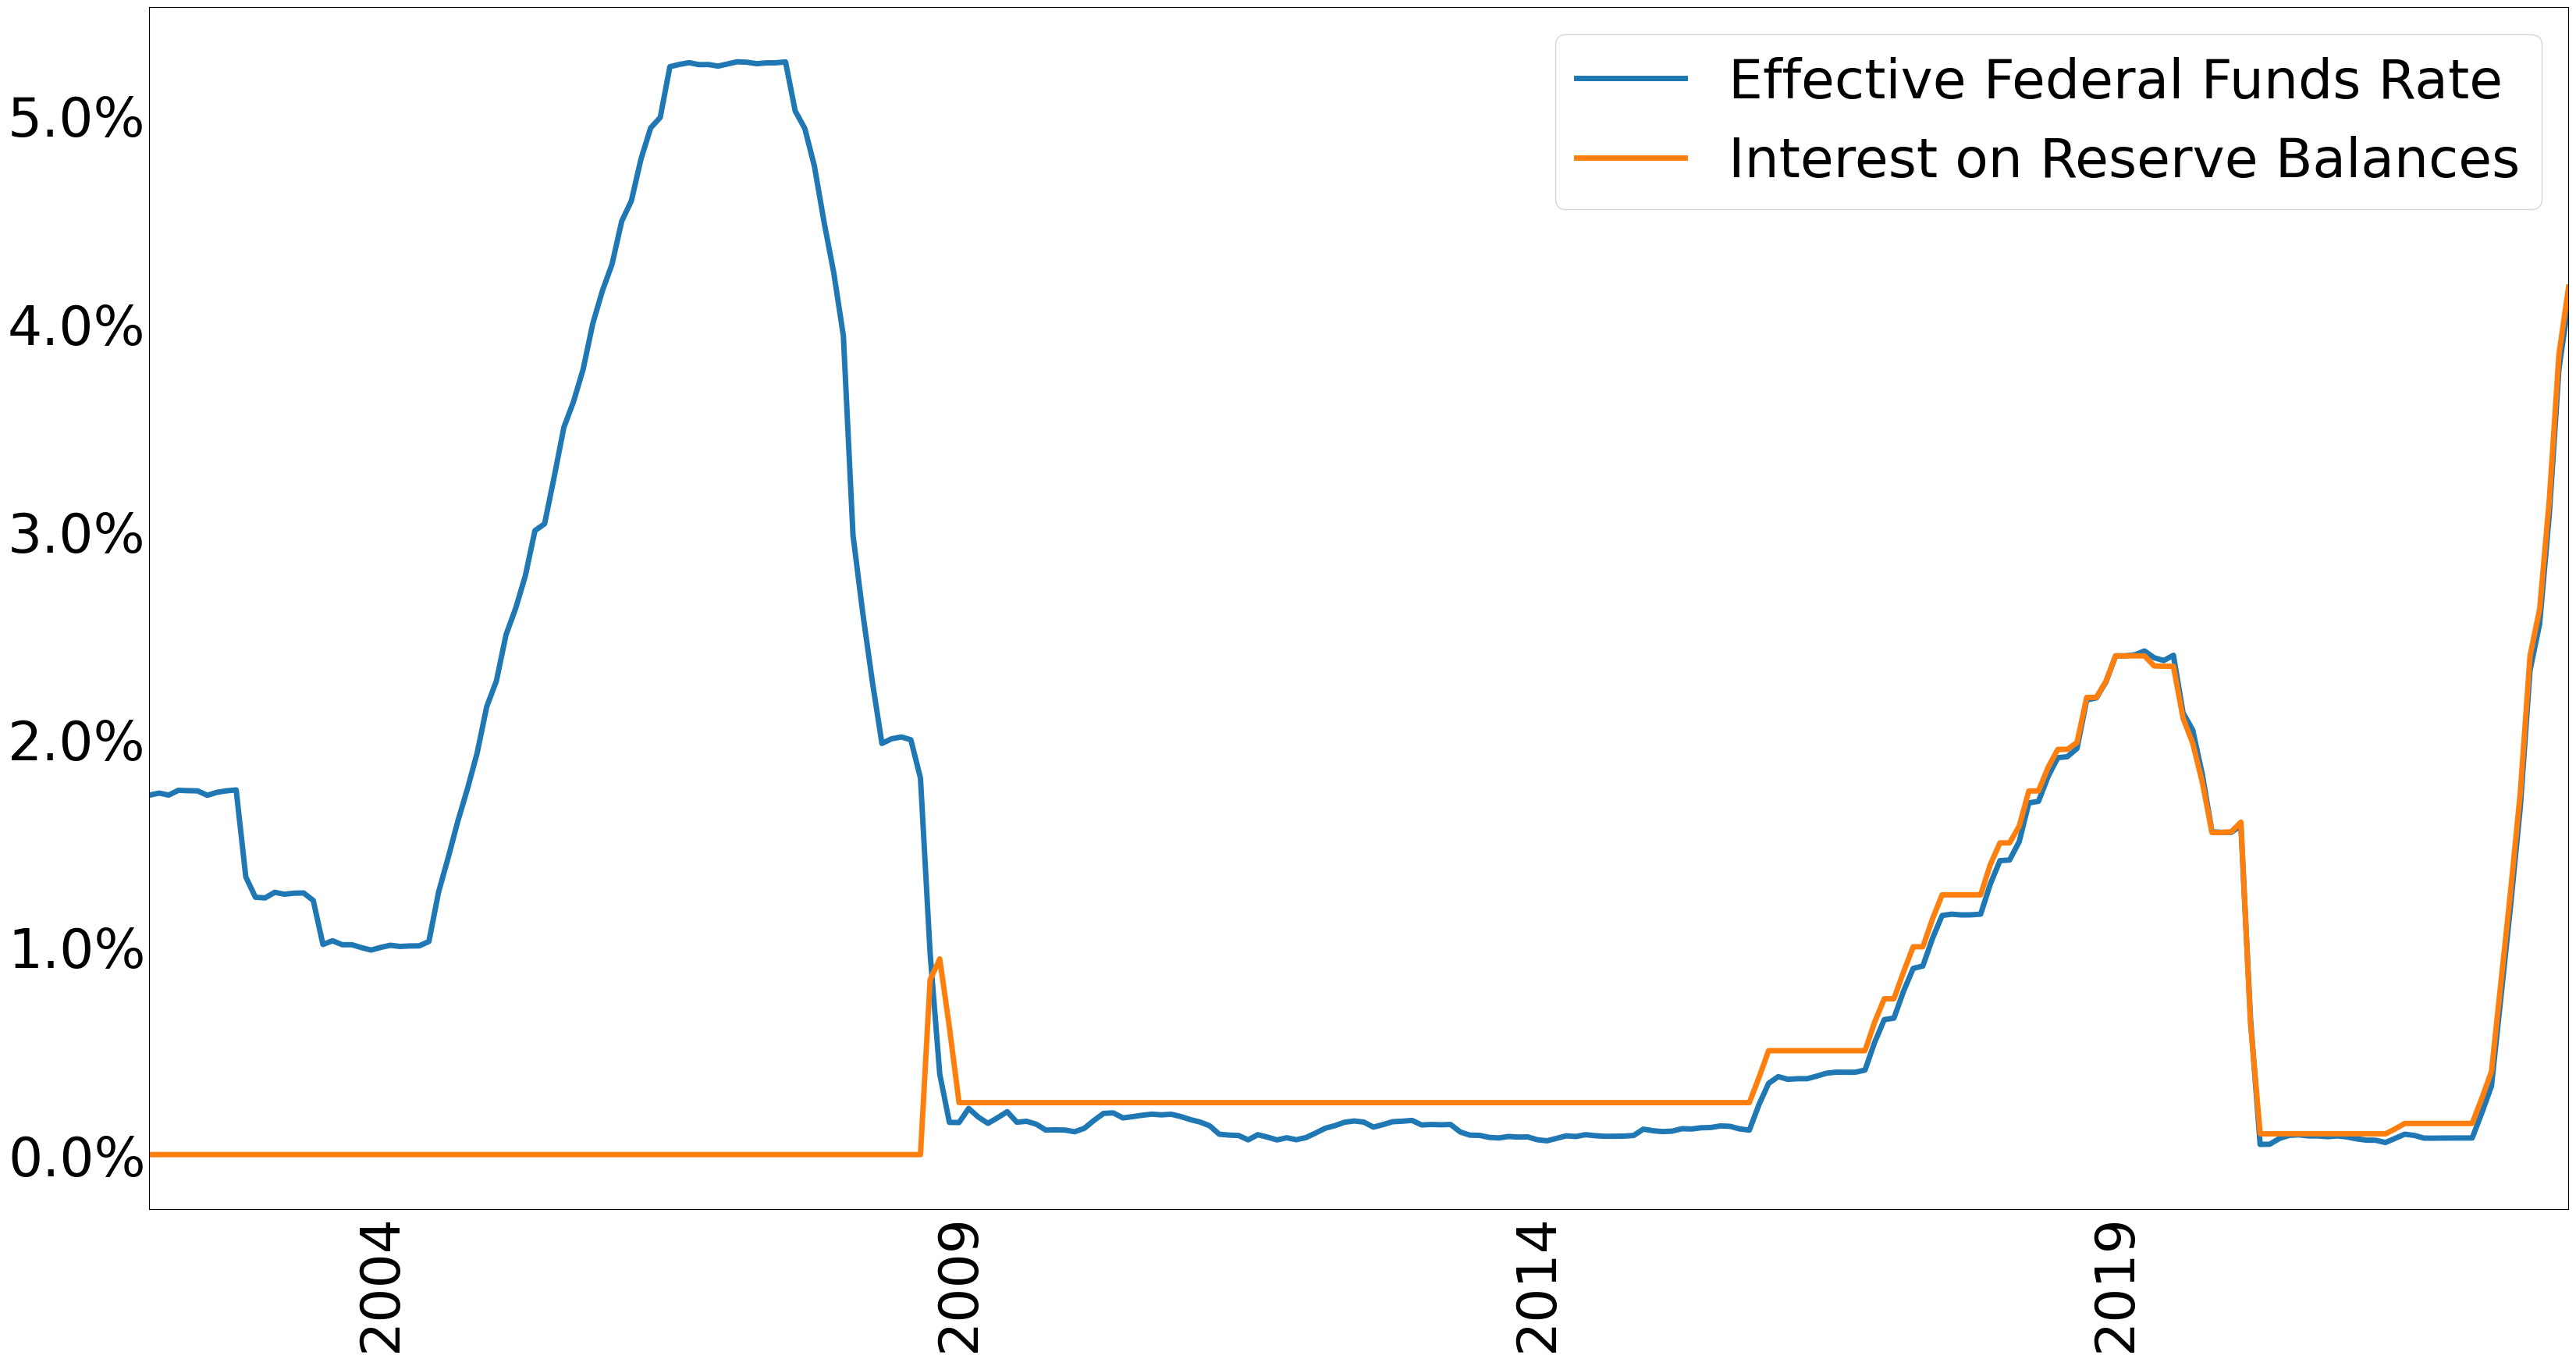

In [17]:
import os

def plot_lines(df,
                linewidth = 5,
                figsize = (40, 20),
                secondary_y = None,
                legend = True,
                pp = None,
                save_fig = False,
                global_fontsize = 50):
    # Update the font size of all labels and titles
    plt.rcParams.update({'font.size' : global_fontsize})
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize = figsize)
    
    # Plot the lines
    df.dropna(axis = 0, how = 'all').plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    
    # Remove the label for the x-axis
    ax.set_xlabel('')
    
    # Rotate the tick labels on the x-axis
    ax.tick_params(axis= 'x', rotation = 90)
    
    # Remove tick marks on both axes
    ax.tick_params(length = 0, which = 'both')


    # # round axis tick values
    # # 1. access values
    # Round the tick values on the y-axis to 2 decimal places
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])

    # Save the figure as file to disk
    remove_chars = "[] : $ '\\'"
    filename = str(list(df.keys()))

    # Remove invalid characters from the filename
    for char in remove_chars:
        filename = filename.replace(char, '')
    
    if save_fig:
        folder = 'Monetary Plots'
        try:
            os.mkdir(folder)
        except:
            pass
        plt.savefig(folder + '/' + filename[ :50] + ' line.png',
                    bbox_inches = 'tight')

    return fig, ax


# Select the data to plot
plot_data = data[['Effective Federal Funds Rate',
                    'Interest on Reserve Balances']]

# Plot the data
fig, ax = plot_lines(plot_data, save_fig= True)
y_vals = ax.get_yticks()
ax.set_yticklabels([str(y) + '%' for y in y_vals])

### Monetary Base

In [18]:
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = data[key].mul(10 ** 3)

In [19]:
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data = data[money_vars]
plot_data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Excess Reserves ($ Mil)
DATE,,,
2002-01-31,653800.0,635429.00,1446.20
2002-02-28,654600.0,635884.00,1377.25
2002-03-31,659000.0,639697.50,1370.25
2002-04-30,663400.0,643579.50,1263.50
2002-05-31,668600.0,648293.20,1256.20
...,...,...,...
2022-08-31,5582300.0,2275415.60,NaN
2022-09-30,5410900.0,2279946.25,NaN
2022-10-31,5339700.0,2283799.00,NaN


C:\Users\akoto\AppData\Local\Temp\ipykernel_4300\4139410198.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: >)

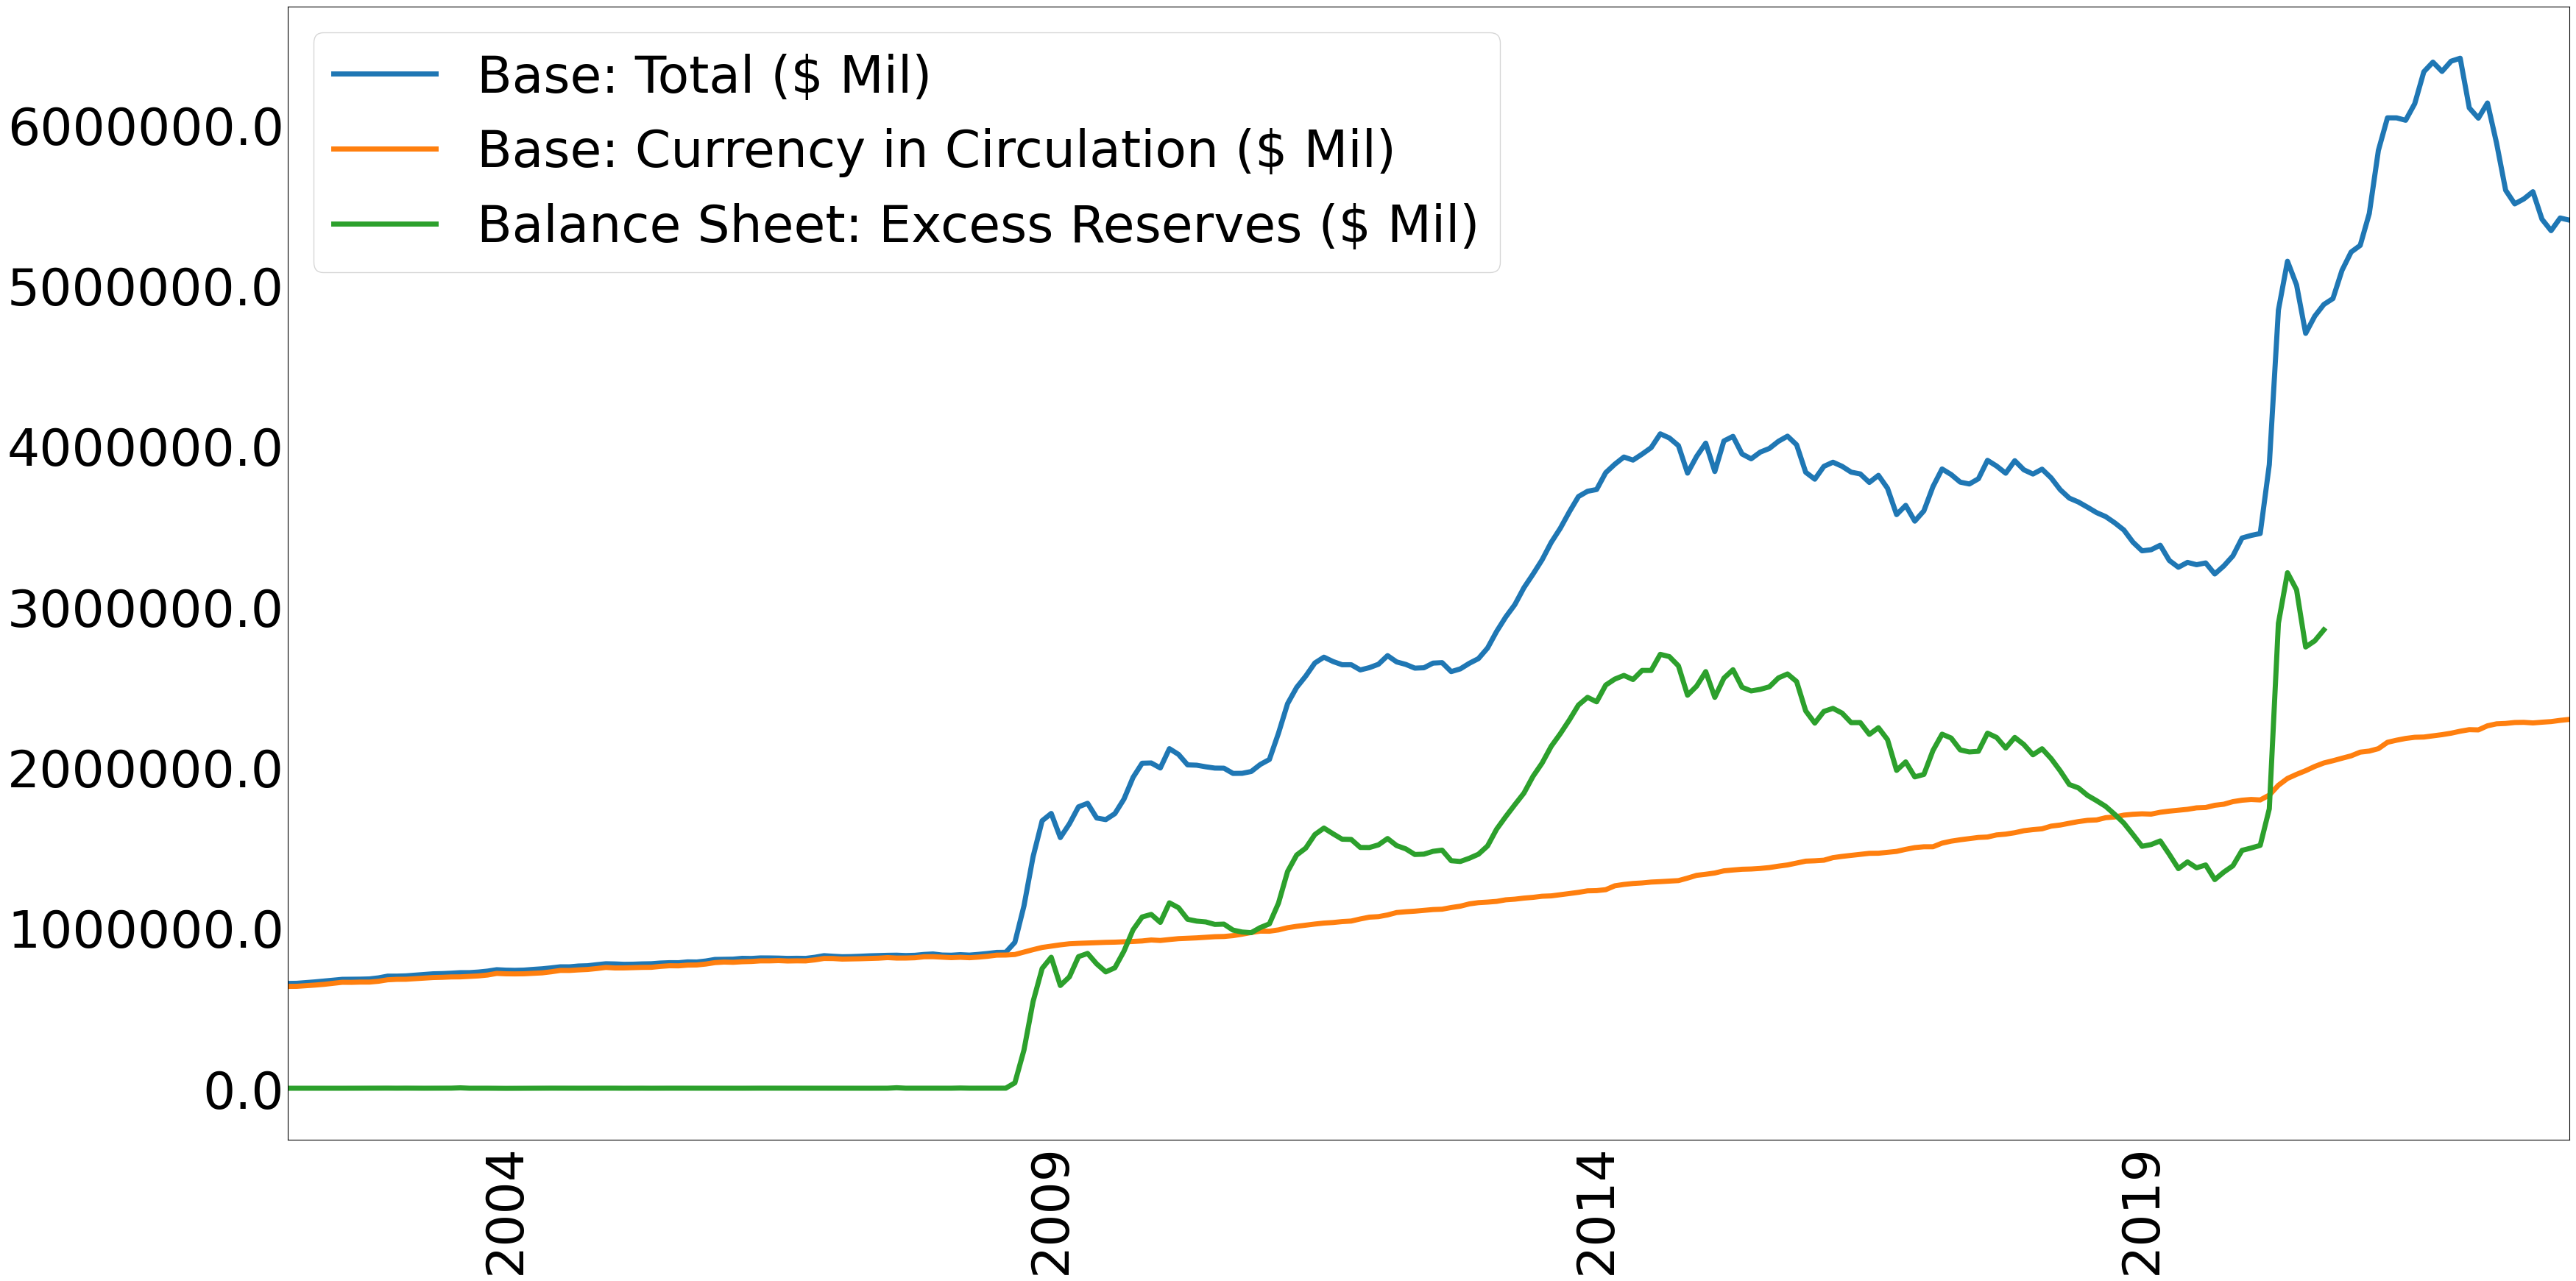

In [20]:
plot_lines(df = plot_data, linewidth = 5, figsize = (40, 20), pp = None)

### Stacked Lines

(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: xlabel='DATE'>)

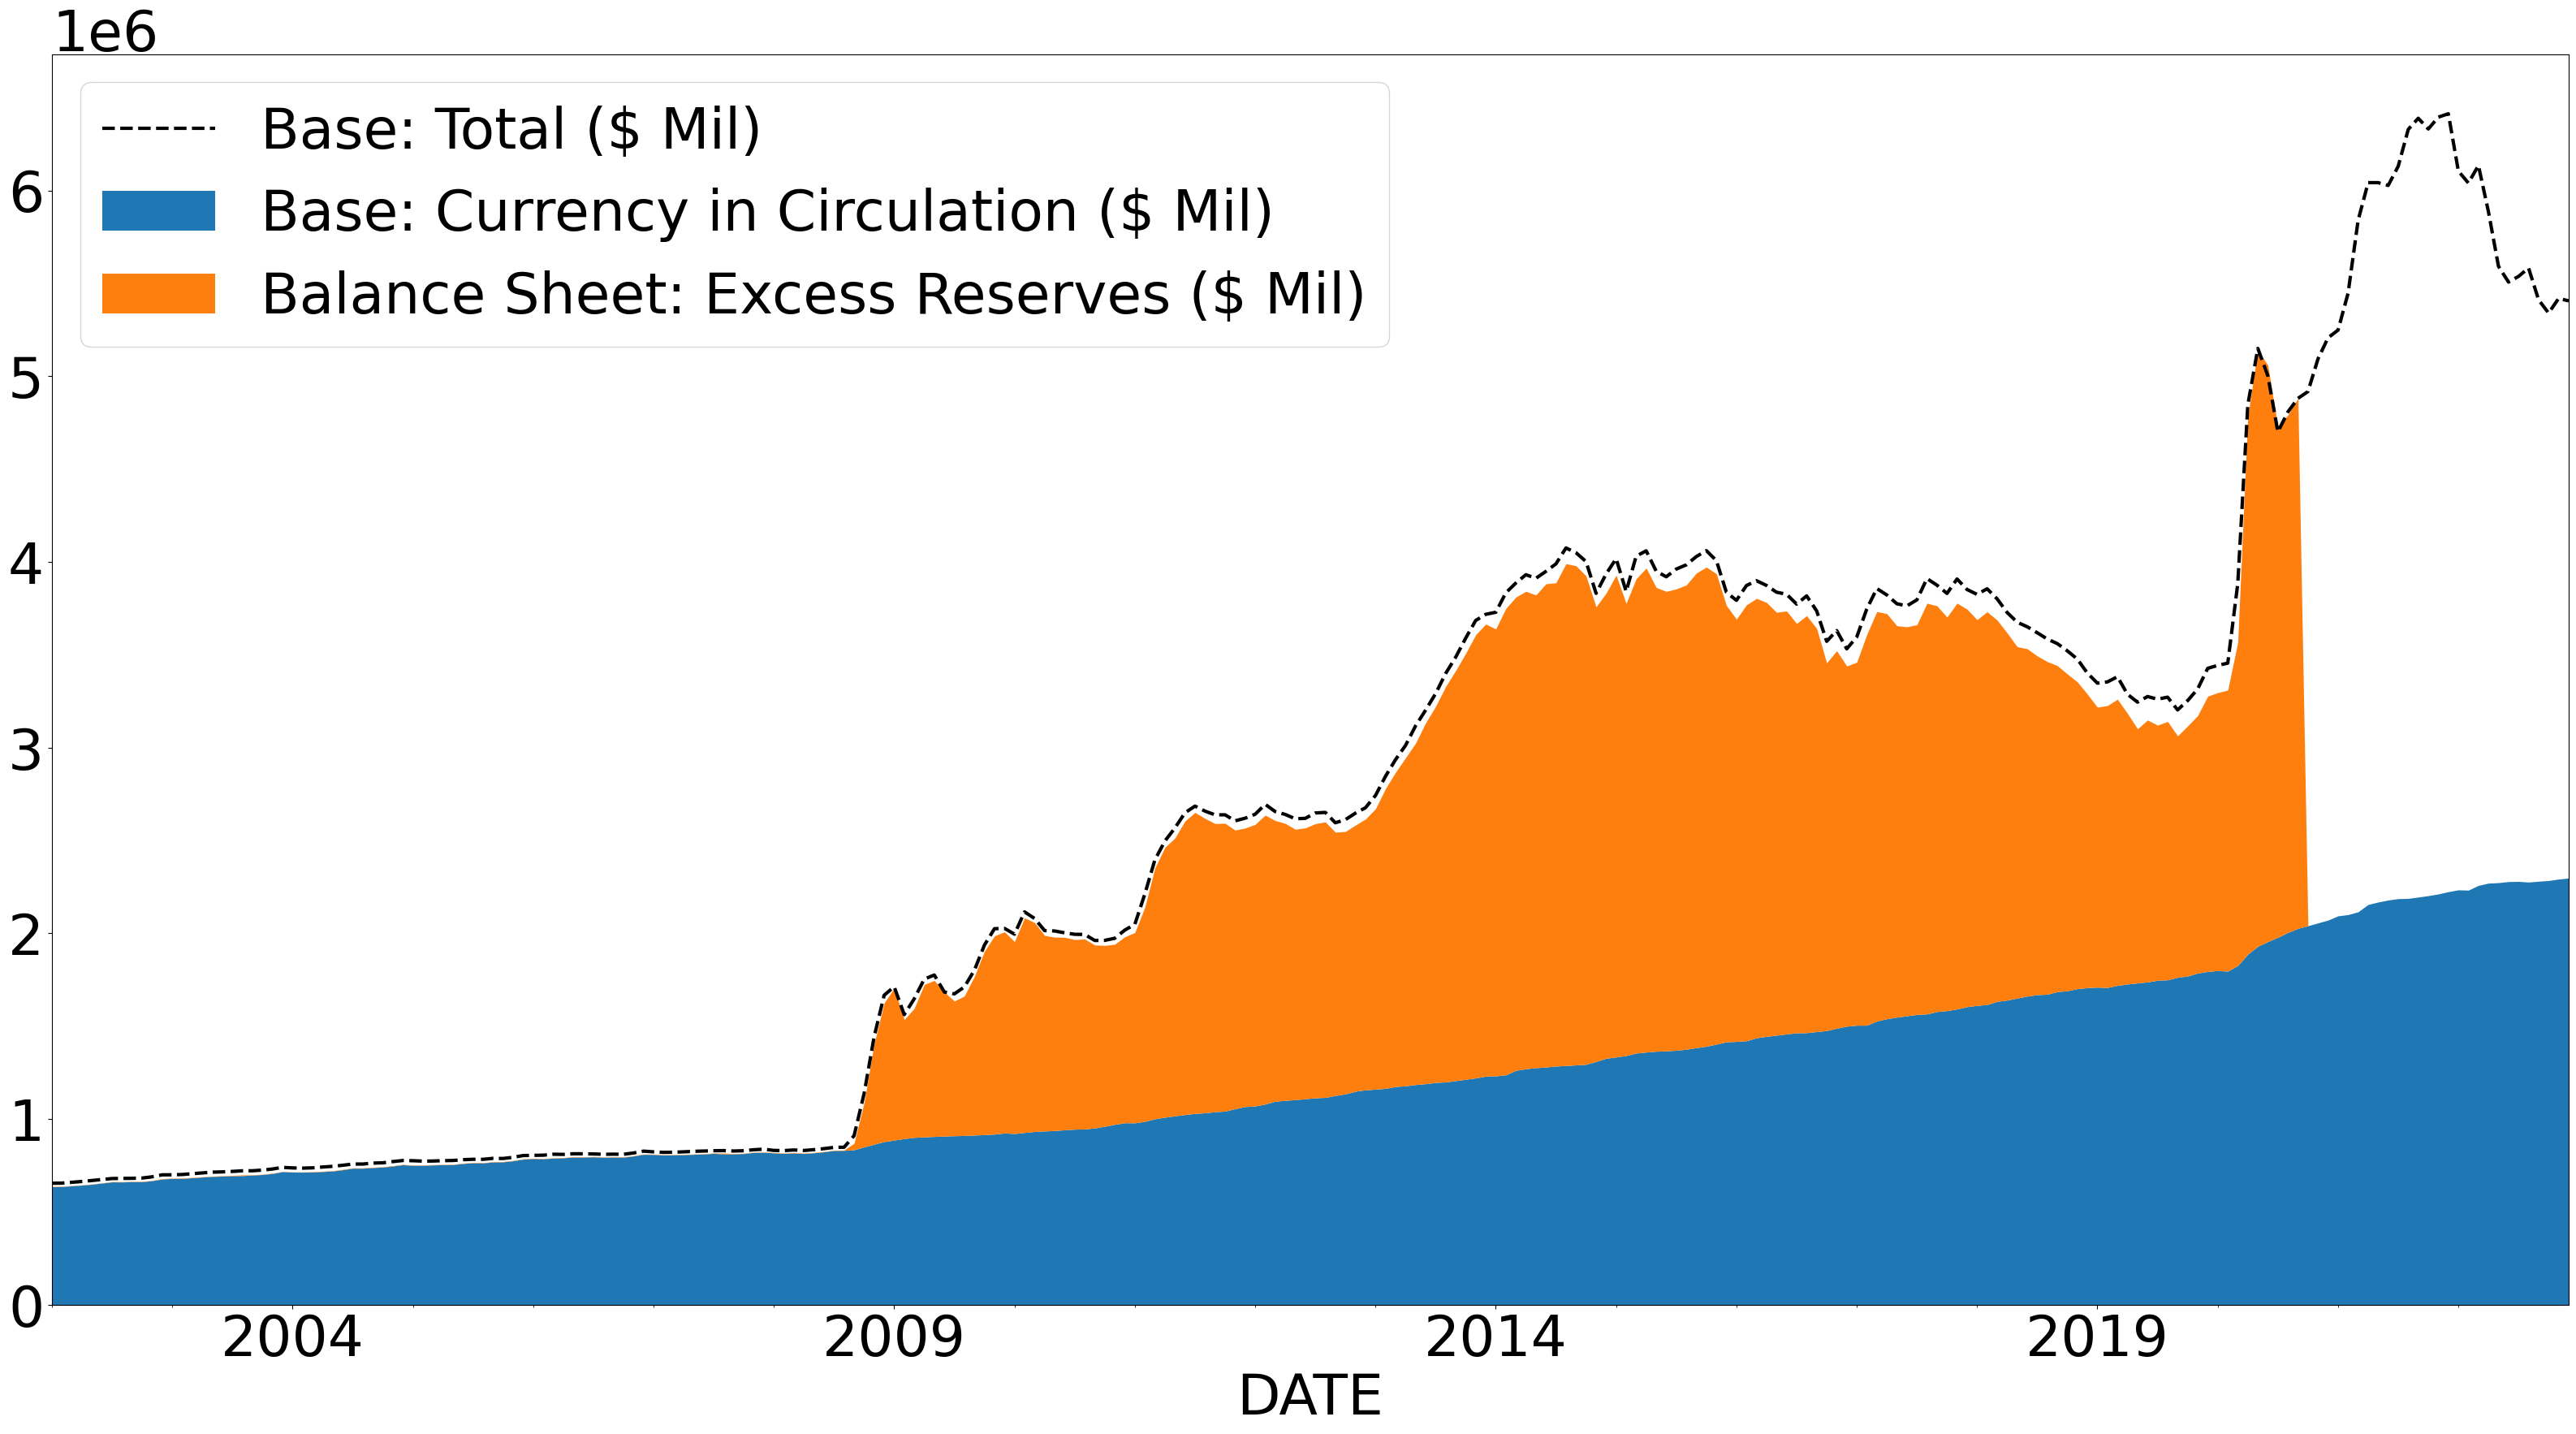

In [21]:
def plot_stacked(df,
                stacked_vars,
                linewidth = 3,
                figsize = (40, 20),
                total_var = False,
                global_fontsize = 50,
                ncol = 1):
    plt.rcParams.update({'font.size' : global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)

    if total_var != False:
            df[total_var].plot.line(
                linewidth = linewidth, 
                ax = ax, 
                c = 'k',
                label = total_var, 
                ls = '--')
# Create a DataFrame containing only the stacked variables and 
# plot them as a stacked area chart
    area_df = df[stacked_vars]
    area_df.plot.area(stacked = True,
                    linewidth = 0,
                    ax = ax)
                    
# Add a legend to the chart
    ax.legend(loc=2, ncol = ncol)
            #bbox_to_anchor = (0, 1)

    return fig, ax

stacked_vars = money_vars[1:]
total_var = money_vars[0]
plot_stacked(df = data,
            stacked_vars = stacked_vars,
            total_var = total_var)